<a href="https://colab.research.google.com/github/Annette-1/Ecuaciones_Diferenciales_Parciales/blob/main/Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:orange;">Resolver ecuaciones diferenciales ordinarias con  SymPy (Python)</span>

##Comandos basicos para resolver ecuaciones diferenciales en Simpy

<span style="color:purple;"> **Tema 1.Python**</span>
Para  resolver  con  SymPy  usamos  dsolve  con  la  sintaxis:
<span style="color:blue;">sympy.solvers.ode.dsolve(eq,func=None,hint'default’,simplify=True,ics=None,xi=None, eta=None,x0=0,n=6,**kwargs).</span>

importamos la librerías SymPy a Python

In [ ]:
import sympy as sp
import numpy as exp

Definimos las variables independiente y dependiente ası como los parametros de forma simbolica

In [ ]:
t=sp.symbols('t')
p=sp.Function('p')
a=sp.symbols('a')
b=sp.symbols('b')
p0=sp.symbols('p0')

Ahora definimos la ecuación diferencial con la condición inicial usando dsolve:

In [ ]:
ode=sp.Eq(sp.Derivative(p(t),t)-a*p(t)+b*p(t)*p(t),0)
sol = sp.dsolve(ode,p(t),ics={p(0):p0})

Obteniendo así la solución:
<span style="color:blue;">Nota: poner sp.Eq("...") para q defina la función</span>

In [ ]:
sp.Eq(p(t), a*sp.exp(a*(t+sp.log(b*p0/(-a+b*p0))/a))/(b*(sp.exp(a*(t+sp.log(b*p0/(-a + b*p0))/a)) - 1)))

Eq(p(t), a*exp(a*(t + log(b*p0/(-a + b*p0))/a))/(b*(exp(a*(t + log(b*p0/(-a + b*p0))/a)) - 1)))

Definimos a continuación los valores de a,b y p0, y evaluamos las respectivas soluciones (una para cada condición inicial):

In [ ]:
constants={a:0.03,b:0.0001,p0:5}
sol1=sol.subs(constants)
constants={a:0.03,b:0.0001,p0:6}
sol2=sol.subs(constants)
constants={a:0.03,b:0.0001,p0:7}
sol3=sol.subs(constants)

La función lambdify permite definir una función a partir de la expresión simbolica:

In [ ]:
func1 = sp.lambdify(t,sol1.rhs,'numpy')
func2 = sp.lambdify(t,sol2.rhs,'numpy')
func3 = sp.lambdify(t,sol3.rhs,'numpy')

A continuación, importamos los módulos scipy, matplotlib y pyplot para graficar nuestras soluciones:

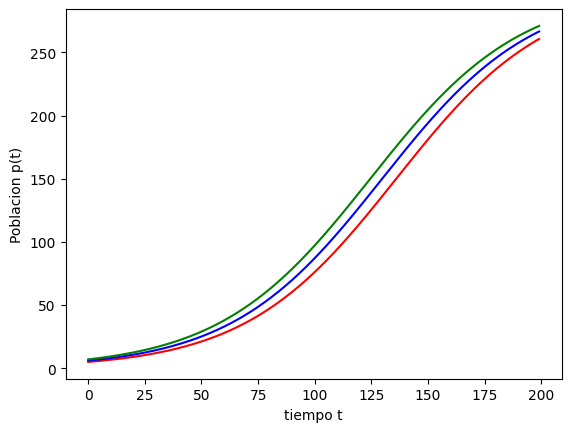

In [ ]:
import numpy as np # Import numpy
import scipy
tt = np.arange(0,200,1) # Use np.arange
pp1 = func1(tt)
pp2 = func2(tt)
pp3 = func3(tt)
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(tt,pp1,'r',tt,pp2,'b',tt,pp3,'g')
plt.xlabel('tiempo t')
plt.ylabel('Poblacion p(t)')
plt.show()

Como observamos, la función anterior nos recomienda algunos de los métodos que podríamos usar como ayudas (hints) para resolver esta ecuación.

In [ ]:
sol=dsolve(ode,p(t))
sol

Eq(p(t), a*exp(a*(C1 + t))/(b*(exp(a*(C1 + t)) - 1)))

##  <span style="color:purple;"> **Tema 2.** Ecuación de Lagrange: $y= 2xy′+ log(y′)$: </span>

In [ ]:
from sympy import *
import sympy as sp
x=sp.symbols('x')
y=sp.Function('y')
ode2=sp.Eq(log(sp.Derivative(y(x),x))+2*x*sp.Derivative(y(x),x)-y(x),0)
sol2 = sp.dsolve(ode2,y(x))

Para obtener:

In [ ]:
Eq(C1-y(x)-log(LambertW(2*x*exp(y(x))) + 2) + LambertW(2*x*exp(y(x))),0)

Eq(C1 - y(x) - log(LambertW(2*x*exp(y(x))) + 2) + LambertW(2*x*exp(y(x))), 0)

###<span style="color:brown;">**2.2- El comando dsolve en SymPy (Python)** </span>

El comando `dsolve()` es la herramienta principal de **SymPy** para resolver ecuaciones diferenciales ordinarias de forma simbólica.

**Sintaxis general:**
```python
dsolve(eq, func=None, hint='default', simplify=True, ics=None,
       xi=None, eta=None, x0=0, n=6, **kwargs)


**Descripción de los parámetros:**

- `eq`: la ecuación diferencial a resolver, puede ser una igualdad `Eq()` o una expresión igualada a cero.
- `func`: la función incógnita (por ejemplo, `y(t)`), normalmente se detecta automáticamente.
- `hint`: sugiere un método específico para resolver la EDO (por ejemplo, 'separable', 'Bernoulli').
- `classify_ode(eq)` permite conocer todos los métodos posibles (`hints`) disponibles.
- `simplify`: aplica simplificaciones simbólicas al resultado (por defecto es `True`).
- `ics`: condiciones iniciales en forma de diccionario, por ejemplo `{y(0): 1, y'(0): 0}`.
- `xi`, `eta`: funciones infinitesimales usadas en métodos de simetría de Lie (generalmente no se usan en cursos básicos).
- `x0`: punto alrededor del cual se centra la solución en serie.
- `n`: número de términos en una solución en serie de potencias.

Este comando es muy flexible y permite resolver una amplia variedad de ecuaciones diferenciales, tanto con solución cerrada como en forma de series.

A continuación, mostramos un ejemplo básico de uso.

In [ ]:
import sympy as sp
from sympy import Function, symbols, Eq, Derivative, dsolve

# Definir variable y función
t = symbols('t')
y = Function('y')

# Definir una EDO sencilla: y'' - y = 0
edo = Eq(Derivative(y(t), t, t) - y(t), 0)

# Resolver la EDO con dsolve
sol = dsolve(edo, y(t))

# Mostrar la solución
sp.pprint(sol)

           -t       t
y(t) = C₁⋅ℯ   + C₂⋅ℯ 


##<span style="color:brown;">**Subtema 3.** Ejemplo 1: Ecuación Logística</span>
La ecuación logística modela el crecimiento de una población `p(t)` considerando un límite natural o "capacidad de carga". Su forma general es:

$
\frac{dp}{dt} = ap - bp^2, \quad p(0) = p_0$

donde:
- `a` es la tasa de crecimiento,
- `b` representa el efecto limitante (competencia),
- `p₀` es la población inicial.

Usaremos `SymPy` para:
1. Definir la ecuación diferencial y resolverla simbólicamente con `dsolve`,
2. Sustituir valores de parámetros con `subs`,
3. Graficar las soluciones para distintos valores iniciales usando `matplotlib`.

Este ejemplo también permite aplicar funciones auxiliares como `lambdify`, para convertir expresiones simbólicas en funciones evaluables numéricamente.

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Function, Eq, Derivative, dsolve, lambdify

# Definir variables simbólicas
t = sp.symbols('t')
p = sp.Function('p')
a, b, p0 = sp.symbols('a b p0')

# Definir la ecuación logística
ode = sp.Eq(Derivative(p(t), t), a*p(t) - b*p(t)**2)

# Resolver la EDO con condición inicial
sol = dsolve(ode, p(t), ics={p(0): p0})

# Mostrar solución simbólica
sp.pprint(sol)

               ⎛       ⎛  b⋅p₀   ⎞⎞   
               ⎜    log⎜─────────⎟⎟   
               ⎜       ⎝-a + b⋅p₀⎠⎟   
             a⋅⎜t + ──────────────⎟   
               ⎝          a       ⎠   
          a⋅ℯ                         
p(t) = ───────────────────────────────
         ⎛   ⎛       ⎛  b⋅p₀   ⎞⎞    ⎞
         ⎜   ⎜    log⎜─────────⎟⎟    ⎟
         ⎜   ⎜       ⎝-a + b⋅p₀⎠⎟    ⎟
         ⎜ a⋅⎜t + ──────────────⎟    ⎟
         ⎜   ⎝          a       ⎠    ⎟
       b⋅⎝ℯ                       - 1⎠


Sustituyendo valores específicos para los parámetros `a`, `b` y condiciones iniciales `p₀ = 5, 6, 7` y graficamos las soluciones en el intervalo `t ∈ [0, 200]`.

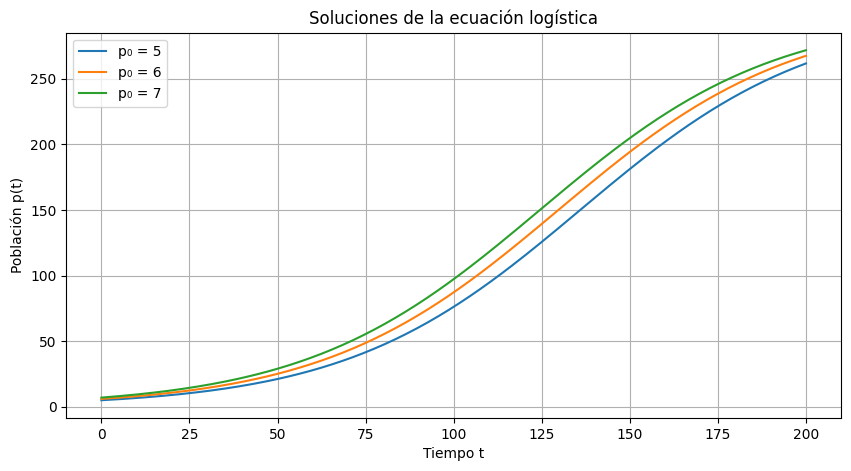

In [ ]:
# Sustituir valores de parámetros
valores1 = {a: 0.03, b: 0.0001, p0: 5}
valores2 = {a: 0.03, b: 0.0001, p0: 6}
valores3 = {a: 0.03, b: 0.0001, p0: 7}

# Sustituir en la solución
sol1 = sol.subs(valores1)
sol2 = sol.subs(valores2)
sol3 = sol.subs(valores3)

# Crear funciones numéricas con lambdify
func1 = lambdify(t, sol1.rhs, 'numpy')
func2 = lambdify(t, sol2.rhs, 'numpy')
func3 = lambdify(t, sol3.rhs, 'numpy')

# Generar datos y graficar
tt = np.linspace(0, 200, 200)
pp1 = func1(tt)
pp2 = func2(tt)
pp3 = func3(tt)

plt.figure(figsize=(10,5))
plt.plot(tt, pp1, label='p₀ = 5')
plt.plot(tt, pp2, label='p₀ = 6')
plt.plot(tt, pp3, label='p₀ = 7')
plt.xlabel('Tiempo t')
plt.ylabel('Población p(t)')
plt.title('Soluciones de la ecuación logística')
plt.grid(True)
plt.legend()
plt.show()

##  <span style="color:purple;"> **tema 4.** Resonancia: </span>

Dada la ecuaciòn

$y'' + 16y = 8sen(4t) \quad y(0) = 1 \quad y'(0) = 0$


In [5]:
from sympy import *
import sympy as sp

In [6]:
t=sp.symbols('t')
y=sp.Function('y')

In [7]:
ode3=sp.Eq(sp.Derivative(y(t),t,t)+16*y(t)-8*sin(4*t),0)

In [8]:
sol3 = sp.dsolve(ode3,y(t))
sol3

Eq(y(t), C2*sin(4*t) + (C1 - t)*cos(4*t))

Vamos ahora a definir las condiciones iniciales y substituirlas en la solución:

In [9]:
const=sp.solve([sol3.rhs.subs(t,0)-1, sol3.rhs.diff(t,1).subs(t,0)-0])
C1, C2 = sp.symbols('C1,C2')
sol3=sol3.subs(const)

Definimos una funcion a partir de la solución simbólica obtenida:

In [10]:
func1 = sp.lambdify(t,sol3.rhs,'numpy')
import numpy as np

xx = np.arange(0, 10, 0.1)
yy1 = func1(xx)

Y graficamos con los comandos:

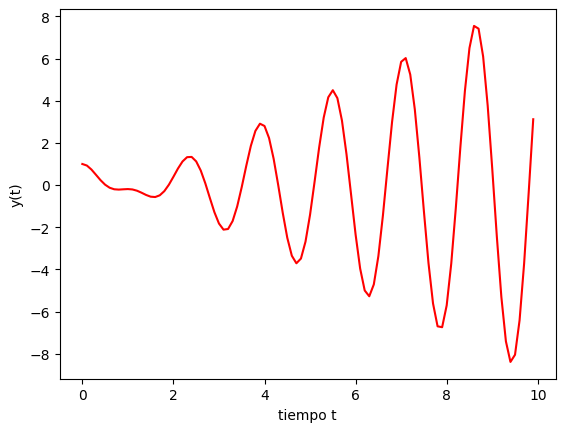

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(xx,yy1,'r')
plt.xlabel('tiempo t')
plt.ylabel('y(t)')
plt.show()

##  <span style="color:purple;"> **tema 5.** Una ecuación homogénea de Cauchy-Euler de cuarto orden: </span>

 esta dada de la forma $x^4y^4(x) + 6x^3y^3(x) + 9x^2y′′(x) + 3xy′(x) +y(x) = 0$

importamos la libreria

In [ ]:
from sympy import *
import sympy as sp

definimos las variables de la EDO

In [ ]:
x=sp.symbols('x')
y=sp.Function('y')
C1, C2, C3, C4 = symbols("C1, C2, C3, C4")
ode5=sp.Eq(x**4*sp.Derivative(y(x),x,4)+6*x*x*x*sp.Derivative(y(x),x,3)+9*x**2*sp.Derivative(y(x),x,2)+3*x*sp.Derivative(y(x),x)+y(x),0)
sol5 = sp.dsolve(ode5,y(x))

para asi obtener

In [ ]:
Eq(y(x),C3*sin(log(x))+C4*cos(log(x))+ (C1*sin(log(x))+C2*cos(log(x)))*log(x))

Eq(y(x), C3*sin(log(x)) + C4*cos(log(x)) + (C1*sin(log(x)) + C2*cos(log(x)))*log(x))

La literatura nos dice que un metodo de solucion de las ecuaciones de Cauchy Euler implica la substitucion $y=x^n$.

In [ ]:
n=sp.symbols('n')
eq=simplify(ode5.subs(y(x),x**n))
factor(eq)

Eq(x**n*(n**2 + 1)**2, 0)

##  <span style="color:purple;"> **Tema 6.** Una ecuacion con problema de valor inicial con deltas de Dirac como fuentes: </span>

Dada la ecuacion $y′′(t)−4y′(t) + 4y(t) = 3δ(t−1) +δ(t−2),  \quad  y(0) = 1,  y′(0) = 1.$

In [ ]:
from sympy import *
import sympy as sp

Definimos las funciones y las variables

In [ ]:
t=sp.symbols('t')
y=sp.Function('y')
ode6=sp.Eq(sp.Derivative(y(t),t,2)-4*sp.Derivative(y(t),t)+4*y(t),3*DiracDelta(t-1)+DiracDelta(t-2))
sol6 = sp.dsolve(ode6)
constants=solve([sol6.rhs.subs(t,0)-1,sol6.rhs.diff(t,1).subs(t,0)-1])
sol6.subs(constants)

Eq(y(t), (t*(exp(-4)*Heaviside(t - 2) + 3*exp(-2)*Heaviside(t - 1) - 1) - 2*exp(-4)*Heaviside(t - 2) - 3*exp(-2)*Heaviside(t - 1) + 1)*exp(2*t))

Para obtener

In [ ]:
Eq(y(t), (t*(exp(-4)*Heaviside(t-2)+3*exp(-2)*Heaviside(t-1)-1)-2*exp(-4)*Heaviside(t-2) - 3*exp(-2)*Heaviside(t-1)+1)*exp(2*t))

Eq(y(t), (t*(exp(-4)*Heaviside(t - 2) + 3*exp(-2)*Heaviside(t - 1) - 1) - 2*exp(-4)*Heaviside(t - 2) - 3*exp(-2)*Heaviside(t - 1) + 1)*exp(2*t))

*Nota: este tipo de ecuacion diferencial requiere para su solucion, la tecnica de transformada de Laplace (incluida en el  comando  dsolve). Modificar  las fuentes $Δ(t−t_0)$ para diferentes valores de $t_0$ y observar el efecto que causa en las soluciones*

##  <span style="color:purple;"> **Tema 7.** Una ecuacion-Sistema masa-resorte:$mx′′(t) +ke−αtx(t) = 0$.: </span>

Este modelo describe el movimiento de una masa unida a un resorte cuya fuerza de restitución disminuye con el tiempo.

donde:
- `m` es la masa del cuerpo,
- `k` es la constante del resorte,
- `α` es el coeficiente de decaimiento,
- `y(t)` es la posición de la masa con respecto al tiempo.


En este caso, la constante del resorte `k` se ve afectada por un término exponencial que depende del tiempo `t`. Esto puede interpretarse como un resorte que pierde rigidez (o fuerza de restitución) con el paso del tiempo.

Se trata de una ecuación diferencial **lineal, homogénea y de segundo orden con coeficientes variables**.

Esta ecuación se puede resolver simbólicamente en Python usando la librería **SymPy** y el comando `dsolve()`. El resultado se presenta como una **serie de potencias**, lo cual es común cuando los coeficientes dependen del tiempo y no se dispone de una solución cerrada con funciones elementales.Es  decir como la solución no puede expresarse con funciones elementales, SymPy devuelve una **serie de potencias** centrada en `t = 0`.

In [ ]:
from sympy import *
import sympy as sp


In [ ]:
t=sp.symbols('t')
y=sp.Function('y')
m=sp.symbols('m')
k=sp.symbols('k')
a=sp.symbols('a')
ode7=sp.Eq(m*sp.Derivative(y(t),t,t)+k*exp(-a*t)*y(t),0)
sol7 = sp.dsolve(ode7,y(t))

Para obtener

In [ ]:
Eq(y(t),C2*(k**2*t**4*exp(-2*a*t)/(24*m**2)-k*t**2*exp(-a*t)/(2*m)+1) +C1*t*(-k*t**2*exp(-a*t)/(6*m) + 1) + O(t**6))

Eq(y(t), C2*(k**2*t**4*exp(-2*a*t)/(24*m**2) - k*t**2*exp(-a*t)/(2*m) + 1) + C1*t*(-k*t**2*exp(-a*t)/(6*m) + 1) + O(t**6))

##<span style="color:brown;">**Tema 9.** Ecuación de Airy </span>

La ecuación diferencial que se estudia es:

$y''(t) - t y(t) = 0$

SymPy puede resolver esta ecuación de dos formas:

1. **Solución general**, en términos de funciones especiales de Airy: `airyai(t)` y `airybi(t)`.
2. **Solución en serie de potencias**, centrada en un punto como `t = 0` o `t = 1`, útil para aproximaciones o gráficas.

A continuación se muestra cómo se implementa esto en Python usando SymPy.

In [ ]:
import sympy as sp

t = sp.symbols('t')
y = sp.Function('y')

# Definimos la ecuación de Airy
ode9 = sp.Eq(sp.Derivative(y(t), t, t) - t*y(t), 0)

# Solución general (con funciones de Airy)
sol9 = sp.dsolve(ode9, y(t))
sp.pprint(sol9)

y(t) = C₁⋅Ai(t) + C₂⋅Bi(t)


Obtenemos así una solución que incluye funciones de Airy:

$y(t) = C_1 \cdot \text{airyai}(t) + C_2 \cdot \text{airybi}(t)$

Para obtener una **solución en serie de potencias centrada en cero**, usamos `hint='2nd_power_series_ordinary'` y condiciones iniciales:
$y(0) = 1, \quad y'(0) = 0$

In [ ]:
# Solución en serie centrada en cero
sols9 = dsolve(ode9, hint='2nd_power_series_ordinary')

# Condiciones iniciales: y(0) = 1, y′(0) = 0
constants = solve([
    sols9.rhs.subs(t, 0) - 1,
    sols9.rhs.diff(t).subs(t, 0)
], dict=True)[0]

# Sustitución y expansión
ysol = expand(sols9.rhs.subs(constants))
pprint(ysol.series(t, 0, 6))

Y así obtenemos la serie centrada en 0:

$1 + t + \frac{t^3}{6} + \frac{t^4}{12} + \mathcal{O}(t^6)$

También se puede obtener una **serie centrada en t = 1**, con condiciones:

$y(1) = 1, \quad y'(1) = 1$

In [ ]:
# Serie centrada en t = 1 a partir de la solución general
s9 = simplify(series(sol9.rhs, t, 1))
ds9 = diff(s9, t)

# Condiciones: y(1) = 1, y′(1) = 1
constants = solve([
    s9.subs(t, 1) - 1,
    ds9.subs(t, 1) - 1
], dict=True)[0]

# Sustitución y expansión
ss9 = s9.subs(constants)
pprint(simplify(series(ss9, t, 1, 6)))

Y así obtenemos la serie centrada en 1:

$(t - 1)^2/2 + (t - 1)^3/3 + (t - 1)^4/8 + (t - 1)^5/24 + \dots$

más términos con productos de las funciones `airyai`, `airybi`, y sus derivadas evaluadas en `t = 1`.

#### *Gráfica de las soluciones con diferentes condiciones iniciales*

Resolvemos la ecuación de Airy con dos conjuntos distintos de condiciones iniciales:

- Solución \( y_1(t) \): \( y_1(0) = 0 \), \( y_1'(0) = 1 \)
- Solución \( y_2(t) \): \( y_2(0) = 1 \), \( y_2'(0) = 0 \)

Estas soluciones nos permiten observar el comportamiento del sistema tanto para valores negativos como positivos de \( t \). Usamos `lambdify` para graficarlas.

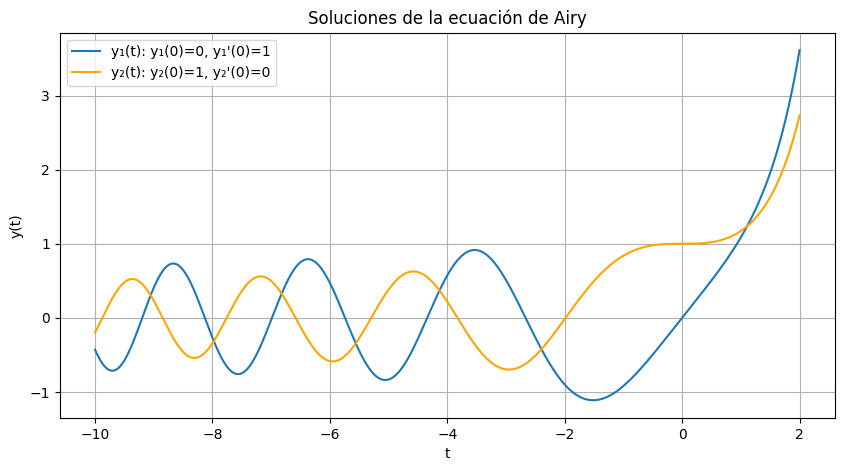

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Derivative, lambdify, dsolve

# Resolver y₁: y₁(0) = 0, y₁′(0) = 1
sol_y1 = dsolve(ode9, y(t), ics={y(0): 0, Derivative(y(t), t).subs(t, 0): 1})
y1_func = lambdify(t, sol_y1.rhs, modules='scipy')  # <--- AQUÍ EL CAMBIO

# Resolver y₂: y₂(0) = 1, y₂′(0) = 0
sol_y2 = dsolve(ode9, y(t), ics={y(0): 1, Derivative(y(t), t).subs(t, 0): 0})
y2_func = lambdify(t, sol_y2.rhs, modules='scipy')  # <--- AQUÍ TAMBIÉN

# Intervalo de tiempo
tt = np.linspace(-10, 2, 500)

# Evaluar funciones
y1_vals = y1_func(tt)
y2_vals = y2_func(tt)

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(tt, y1_vals, label="y₁(t): y₁(0)=0, y₁'(0)=1")
plt.plot(tt, y2_vals, label="y₂(t): y₂(0)=1, y₂'(0)=0", color='orange')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Soluciones de la ecuación de Airy')
plt.grid(True)
plt.legend()
plt.show()

##  <span style="color:purple;"> **Capitulo 10.** Campo de direcciones de una ecuación diferencial
: </span>

 La ecuación diferencial que se analiza es:

$
x'(t) = e^{-t} - 2x(t)$

El **campo de direcciones** representa gráficamente la pendiente de las soluciones en cada punto del plano. Nos ayuda a entender visualmente el comportamiento de las soluciones sin necesidad de resolver la EDO.

Para generar esta gráfica en Python se utilizan `NumPy` para crear la malla, y `Matplotlib` para mostrar las flechas del campo vectorial con `quiver`.

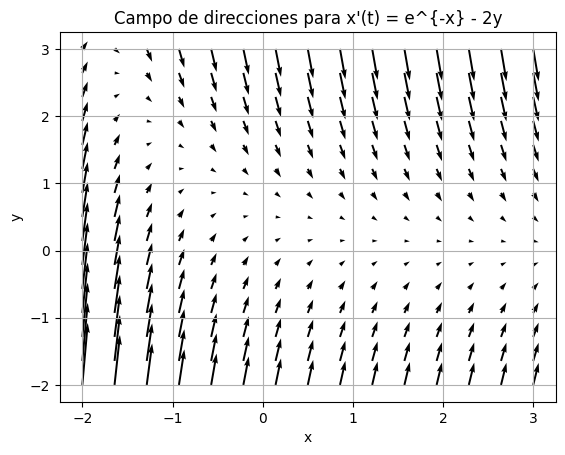

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Crear malla (grid) de puntos en el plano (x, y)
x, y = np.meshgrid(np.linspace(-2, 3, 15), np.linspace(-2, 3, 15))

# Definir la pendiente: x'(t) = exp(-x) - 2*y
u = 1  # eje horizontal constante (t no varía en campo de direcciones)
v = np.exp(-x) - 2*y  # derivada dx/dt

# Graficar el campo de direcciones
plt.quiver(x, y, u, v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Campo de direcciones para x\'(t) = e^{-x} - 2y')
plt.grid(True)
plt.axis('tight')
plt.show()

##  <span style="color:purple;"> **Capitulo 12.** Problema de valor inicial para una ecuación no lineal (solución numérica): </span>
 Dada la ecuación $y′(t) = sen(y^2(t)), \quad y(0) = 1.$


importamos la librerías

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
sin = np.sin

Definimos ahora la funci ́on que define el lado derecho de la ecuación diferencial $\frac{dy}{dt}=f(y, t)$

In [ ]:
def model(y,t):
  dydt=sin(y*y)
  return dydt

y0 = 1
t=np.linspace(0,20)

Resolvemos numéricamente con odeint:
y graficamos

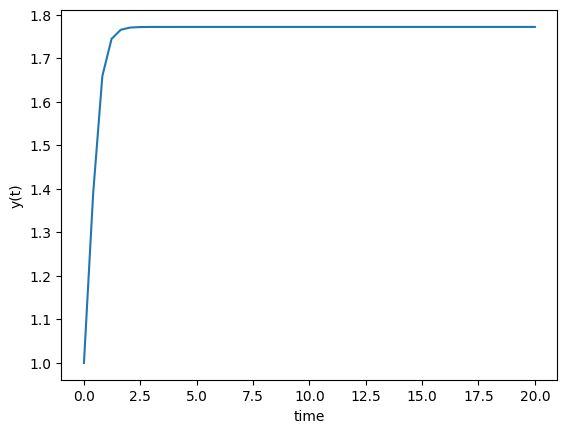

In [ ]:
y=odeint(model,y0,t)
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()